In [2]:
%matplotlib notebook
import processmcrat as pm
import astropy.units as unit
from astropy import constants as const
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [23]:
mcrat_sim1=pm.McratSimLoad(
    "/Users/josearita-escalante/Documents/GRB-NASA/MCRaT-gits/MCRaT-resolution/CHOMBO/science/3000-8000-photons/initial-conditions-res-levs/1/") 
mcrat_sim1.load_frame(250, read_stokes=False)
observation1=pm.MockObservation(1, 4, 1e14, 5, mcratsimload_obj=mcrat_sim1)
observation1.set_spectral_fit_parameters()
lightcurve_dict1=observation1.lightcurve(observation1.detected_photons.detection_time.min()-1, 
                                     observation1.detected_photons.detection_time.max()+1, dt=0.2)

mcrat_sim2=pm.McratSimLoad(
    "/Users/josearita-escalante/Documents/GRB-NASA/MCRaT-gits/MCRaT-resolution/CHOMBO/science/3000-8000-photons/initial-conditions-res-levs/2/") 
mcrat_sim2.load_frame(250, read_stokes=False)
observation2=pm.MockObservation(1, 4, 1e14, 5, mcratsimload_obj=mcrat_sim2)
observation2.set_spectral_fit_parameters()
lightcurve_dict2=observation2.lightcurve(observation2.detected_photons.detection_time.min()-1, 
                                     observation2.detected_photons.detection_time.max()+1, dt=0.2)

mcrat_sim3=pm.McratSimLoad(
    "/Users/josearita-escalante/Documents/GRB-NASA/MCRaT-gits/MCRaT-resolution/CHOMBO/science/3000-8000-photons/initial-conditions-res-levs/3/") 
mcrat_sim3.load_frame(250, read_stokes=False)
observation3=pm.MockObservation(1, 4, 1e14, 5, mcratsimload_obj=mcrat_sim3)
observation3.set_spectral_fit_parameters()
lightcurve_dict3=observation3.lightcurve(observation3.detected_photons.detection_time.min()-1, 
                                     observation3.detected_photons.detection_time.max()+1, dt=0.2)

mcrat_sim4=pm.McratSimLoad(
    "/Users/josearita-escalante/Documents/GRB-NASA/MCRaT-gits/MCRaT-resolution/CHOMBO/science/3000-8000-photons/initial-conditions-res-levs/4/") 
mcrat_sim4.load_frame(250, read_stokes=False)
observation4=pm.MockObservation(1, 4, 1e14, 5, mcratsimload_obj=mcrat_sim4)
observation4.set_spectral_fit_parameters()
lightcurve_dict4=observation3.lightcurve(observation4.detected_photons.detection_time.min()-1, 
                                     observation4.detected_photons.detection_time.max()+1, dt=0.2)

mcrat_sim5=pm.McratSimLoad(
    "/Users/josearita-escalante/Documents/GRB-NASA/MCRaT-gits/MCRaT-resolution/CHOMBO/science/3000-8000-photons/initial-conditions-res-levs/5/") 
mcrat_sim5.load_frame(250, read_stokes=False)
observation5=pm.MockObservation(1, 4, 1e14, 5, mcratsimload_obj=mcrat_sim5)
observation5.set_spectral_fit_parameters()
lightcurve_dict5=observation5.lightcurve(observation5.detected_photons.detection_time.min()-1, 
                                     observation5.detected_photons.detection_time.max()+1, dt=0.2)

<IPython.core.display.Javascript object>


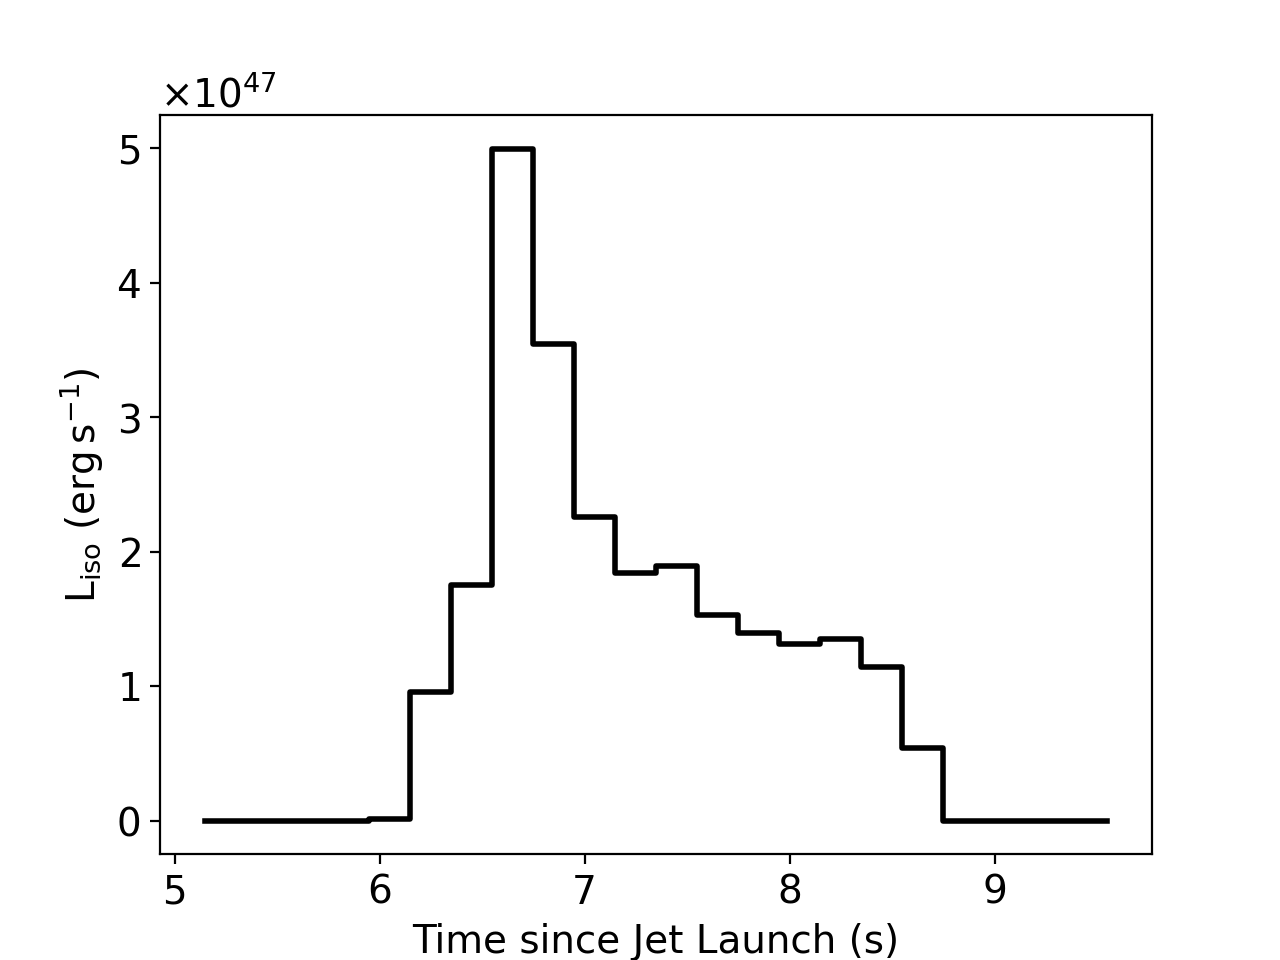

(<Figure size 640x480 with 1 Axes>,
 [<AxesSubplot:xlabel='Time since Jet Launch (s)', ylabel='L$_\\mathrm{iso}$ ($\\mathrm{erg\\,s^{-1}}$)'>,
  nan,
  nan,
  nan,
  nan,
  nan])

In [24]:
pm.plot_lightcurve(lightcurve_dict1)

<IPython.core.display.Javascript object>


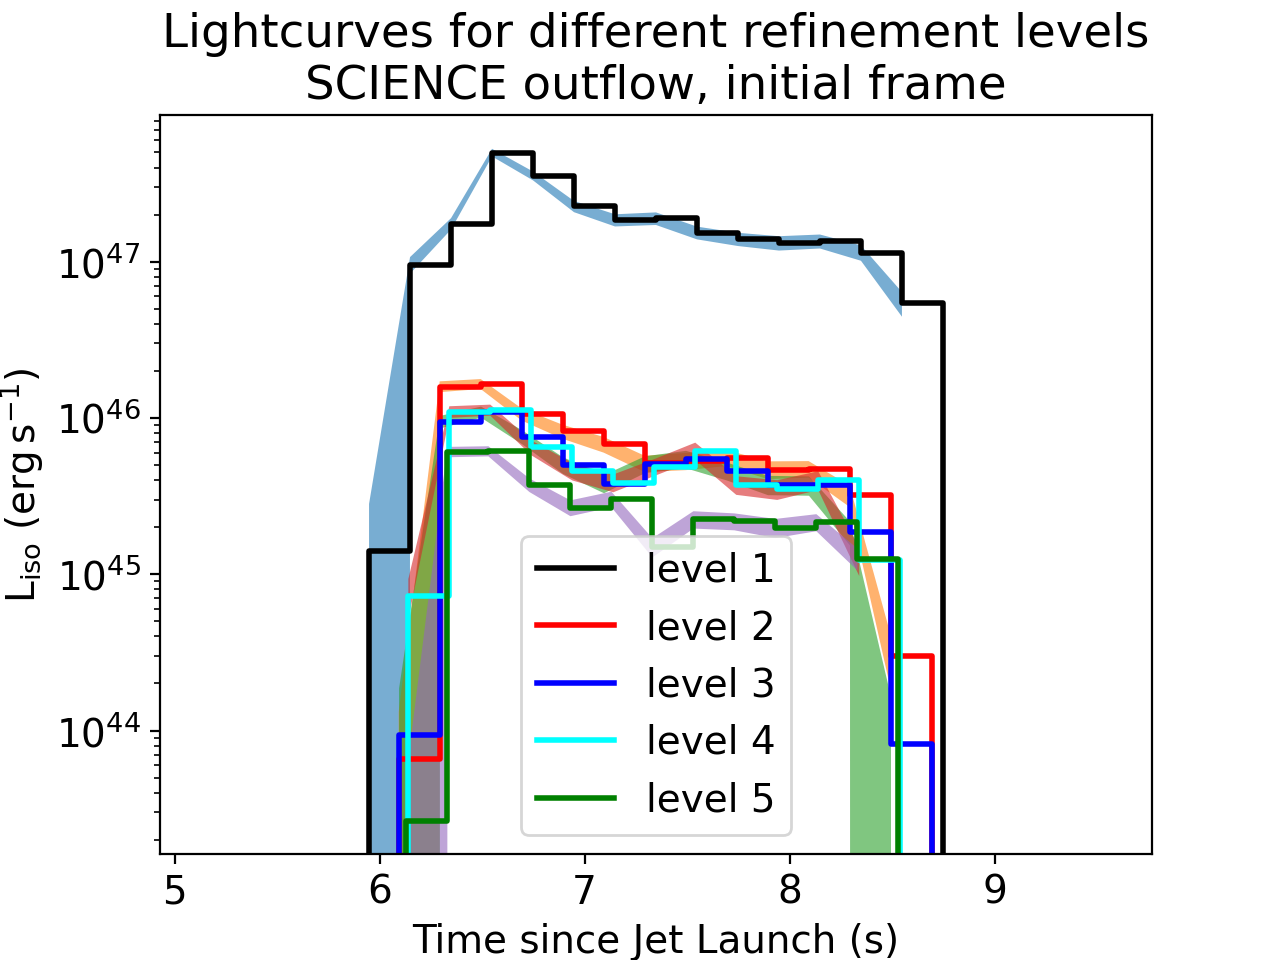

In [27]:
lightcurve_dict_list=[lightcurve_dict1]
"""
    Convenience function to plot the light curves(s) that are provided and the time resolved polarization and spectral
    fit parameters for the first light curve dictionary provided in lightcurve_dict_list
    :param lightcurve_dict_list:
    :param plot_polarization:
    :param plot_spectral_params:
    :return:
    """
plt.rcParams.update({'font.size': 14})
    #see how many panels we need for the plot and how many light curves the user wants plotted
num_panels=1

formatter = matplotlib.ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 1))
    
main_lightcurve_dict = lightcurve_dict_list[0]
num_lc = 1


    #calculate the center of the time bins
difference=np.zeros(main_lightcurve_dict['times'].size)
difference[:main_lightcurve_dict['times'].size - 1] = np.diff(main_lightcurve_dict['times'])
difference[-1] = np.diff(main_lightcurve_dict['times']).min().value
t_cen = (main_lightcurve_dict['times'].value + (main_lightcurve_dict['times'].value + difference)) / 2
x_err=difference/2


f, axarr = plt.subplots(num_panels, sharex=True)

    #decide which panels will plot what based on input
lc_panel = np.nan


lc_panel = axarr

axarr.yaxis.set_major_formatter(formatter)


#lc_panel.plot(main_lightcurve_dict['times'],main_lightcurve_dict['lightcurve'],ds='steps-post', color='k',lw=2)
        #if 'ct' in spectrum_dict['lightcurve'].unit.to_string():
lc_panel.set_ylabel(r'L$_\mathrm{iso}$ ('+main_lightcurve_dict['lightcurve'].unit.to_string('latex_inline')+')')

lc_panel.set_xlabel('Time since Jet Launch (s)')

lc_panel.plot(lightcurve_dict1['times'],lightcurve_dict1['lightcurve'],ds='steps-post', color='k',lw=2, label="level 1")
lc_panel.fill_between(lightcurve_dict1['times'],lightcurve_dict1['lightcurve']-lightcurve_dict1['lightcurve_errors'],lightcurve_dict1['lightcurve']+lightcurve_dict1['lightcurve_errors'],alpha=0.6)

lc_panel.plot(lightcurve_dict2['times'],lightcurve_dict2['lightcurve'],ds='steps-post', color='r',lw=2, label="level 2")
lc_panel.fill_between(lightcurve_dict2['times'],lightcurve_dict2['lightcurve']-lightcurve_dict2['lightcurve_errors'],lightcurve_dict2['lightcurve']+lightcurve_dict2['lightcurve_errors'],alpha=0.6)

lc_panel.plot(lightcurve_dict3['times'],lightcurve_dict3['lightcurve'],ds='steps-post', color='blue',lw=2, label="level 3")
lc_panel.fill_between(lightcurve_dict3['times'],lightcurve_dict3['lightcurve']-lightcurve_dict3['lightcurve_errors'],lightcurve_dict3['lightcurve']+lightcurve_dict3['lightcurve_errors'],alpha=0.6)

lc_panel.plot(lightcurve_dict4['times'],lightcurve_dict4['lightcurve'],ds='steps-post', color='cyan',lw=2, label="level 4")
lc_panel.fill_between(lightcurve_dict4['times'],lightcurve_dict4['lightcurve']-lightcurve_dict4['lightcurve_errors'],lightcurve_dict4['lightcurve']+lightcurve_dict4['lightcurve_errors'],alpha=0.6)

lc_panel.plot(lightcurve_dict5['times'],lightcurve_dict5['lightcurve'],ds='steps-post', color='green',lw=2, label="level 5")
lc_panel.fill_between(lightcurve_dict5['times'],lightcurve_dict5['lightcurve']-lightcurve_dict5['lightcurve_errors'],lightcurve_dict5['lightcurve']+lightcurve_dict5['lightcurve_errors'],alpha=0.6)

plt.title('''Lightcurves for different refinement levels
SCIENCE outflow, initial frame''')

plt.yscale('log')
plt.legend()
plt.show()

